In [26]:
import numpy as np
import pandas as pd
from setuptools.command.rotate import rotate

from pyaw import utils_cal, configs, swarm
import importlib
importlib.reload(utils)
importlib.reload(configs)
importlib.reload(swarm)

<module 'pyaw.swarm' from 'D:\\cleo\\master\\pyaw\\pyaw\\swarm.py'>

In [27]:
fp_e = r"\\Diskstation1\file_three\aw\swarm\A\efi16\sw_efi16A_20160311T000000_20160311T235959_0.pkl"
fp_b = r"\\Diskstation1\file_three\aw\swarm\A\vfm50\sw_vfm50A_20160311T060000_20160311T070000_0.pkl"
start = '20160311T064700'
end = '20160311T064900'

In [28]:
df_e = swarm.pre_e(fp_e,start,end,handle_outliers=True)

df['eh_sc1'] set nan:
20
datetime
2016-03-11 06:47:02.381750107    -25.189461
2016-03-11 06:47:02.881750107    -52.246895
2016-03-11 06:47:05.193749905    -77.747688
2016-03-11 06:47:08.381750107     32.064510
2016-03-11 06:47:12.318749905    122.049973
2016-03-11 06:47:13.193749905    -50.420204
2016-03-11 06:47:20.443749905    -52.979156
2016-03-11 06:47:23.318749905    -57.540714
2016-03-11 06:47:25.443749905     90.709106
2016-03-11 06:47:31.818749905     35.128010
2016-03-11 06:47:32.193749905     71.152878
2016-03-11 06:47:32.506750107     56.372738
2016-03-11 06:47:47.443749905     31.657372
2016-03-11 06:47:48.443749905     27.904247
2016-03-11 06:47:48.568749905     58.081692
2016-03-11 06:47:48.631750107   -630.023132
2016-03-11 06:47:48.693749905   -665.179688
2016-03-11 06:47:48.756750107   -455.312073
2016-03-11 06:47:49.568749905    209.649460
2016-03-11 06:47:53.193749905    125.686043
Name: eh_sc1, dtype: float32

df['eh_sc2'] set nan:
21
datetime
2016-03-11 06:47:04.13

In [29]:
df_b = swarm.pre_b(fp_b,start,end,handle_outliers=True)

df['b_enu1'] set nan:
0
Series([], Name: b_enu1, dtype: float64)

df['b_enu2'] set nan:
0
Series([], Name: b_enu2, dtype: float64)

get background magnetic field and disturb magnetic field using moving average:
complete get


<Axes: xlabel='datetime'>

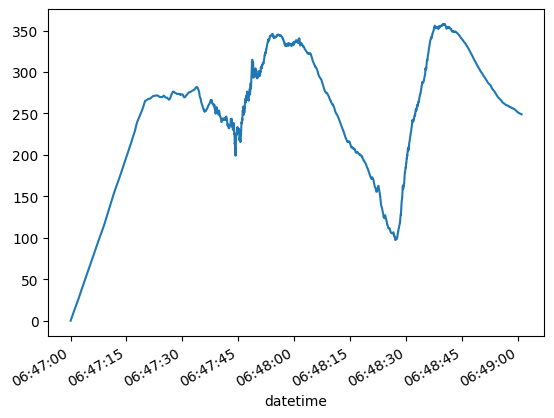

In [34]:
df_b['b1_enu2'].plot()

In [35]:
df_e['timestamp'] = df_e.index.astype('int64')
df_b['timestamp'] = df_b.index.astype('int64')

In [36]:
from scipy.interpolate import interp1d
interp_func1 = interp1d(df_b['timestamp'], df_b['b1_enu1'], kind='linear', fill_value="extrapolate")
interp_func2 = interp1d(df_b['timestamp'], df_b['b1_enu2'], kind='linear', fill_value="extrapolate")
df_e['b1_enu1_interp'] = interp_func1(df_e['timestamp'])
df_e['b1_enu2_interp'] = interp_func2(df_e['timestamp'])

In [37]:
e = df_e['eh1_enu2']
b = df_e['b1_enu1_interp']

In [40]:
from scipy.signal import butter, filtfilt


# 1. 设计带通滤波器
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs  # 计算 Nyquist 频率
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype="band")
    return b, a

# 2. 应用带通滤波器
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# 设置滤波参数
lowcut = 0.2  # 带通滤波器下限频率
highcut = 4.0  # 带通滤波器上限频率

In [43]:
e_filter = pd.Series(index=e.index,data=bandpass_filter(e, lowcut, highcut, fs=16))
b_filter = pd.Series(index=e.index,data=bandpass_filter(b, lowcut, highcut, fs=16))

(<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>)

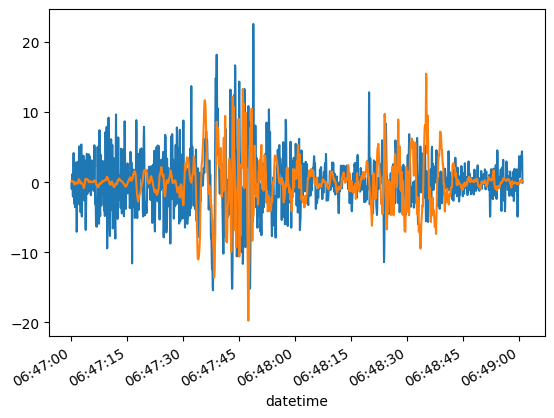

In [45]:
e_filter.plot(),b_filter.plot()

In [87]:
from scipy.signal import spectrogram
nperseg = 2**5

Text(0.5, 1.0, 'e')

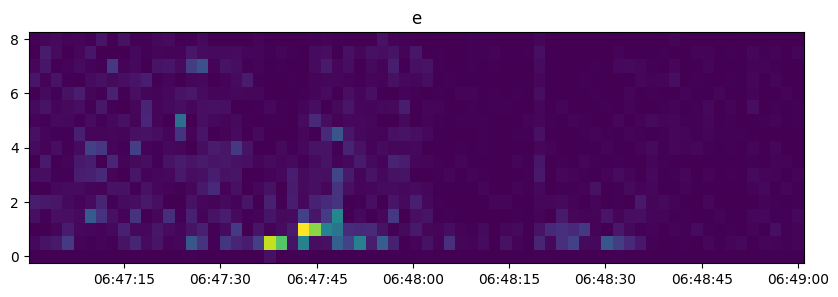

In [88]:
signal = e
frequencies, times, Sxx = spectrogram(signal.values, fs=16,nperseg=nperseg)
from datetime import timedelta, datetime

ts = []
for time in times:
    ts.append(pd.to_datetime(start) + timedelta(seconds=time))
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 3))
plt.pcolormesh(ts,frequencies,Sxx)
plt.title("e")

Text(0.5, 1.0, 'e_filter')

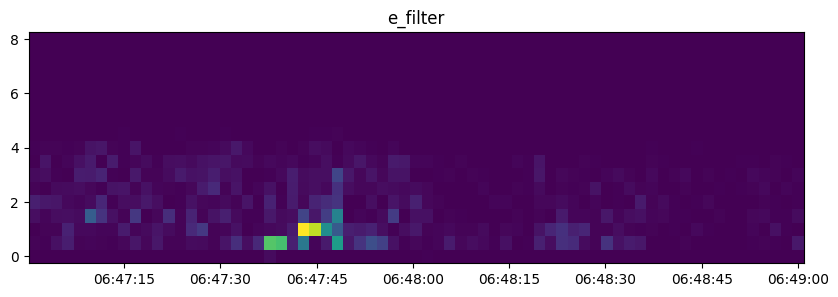

In [90]:
signal = e_filter
frequencies, times, Sxx = spectrogram(signal.values, fs=16,nperseg=nperseg)
from datetime import timedelta
ts = []
for time in times:
    ts.append(pd.to_datetime(start) + timedelta(seconds=time))
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 3))
plt.pcolormesh(ts,frequencies,Sxx)
plt.title("e_filter")

Text(0.5, 1.0, 'b')

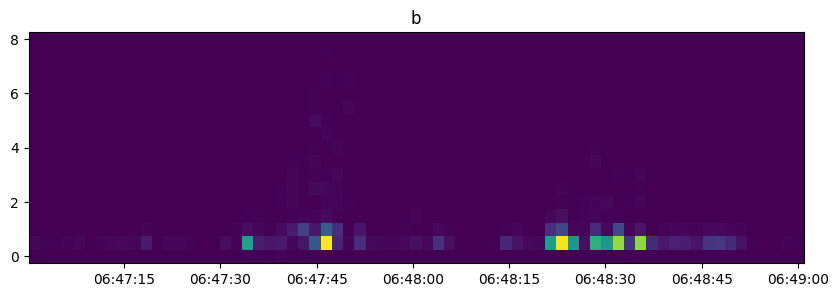

In [91]:
signal = b
frequencies, times, Sxx = spectrogram(signal.values, fs=16,nperseg=nperseg)
from datetime import timedelta
ts = []
for time in times:
    ts.append(pd.to_datetime(start) + timedelta(seconds=time))
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 3))
plt.pcolormesh(ts,frequencies,Sxx)
plt.title("b")

Text(0.5, 1.0, 'b_filter')

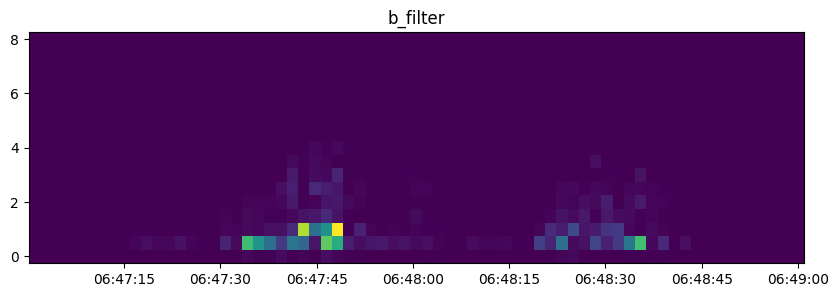

In [92]:
signal = b_filter
frequencies, times, Sxx = spectrogram(signal.values, fs=16,nperseg=nperseg)
from datetime import timedelta
ts = []
for time in times:
    ts.append(pd.to_datetime(start) + timedelta(seconds=time))
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 3))
plt.pcolormesh(ts,frequencies,Sxx)
plt.title("b_filter")

Text(0.5, 1.0, 'e vs b')

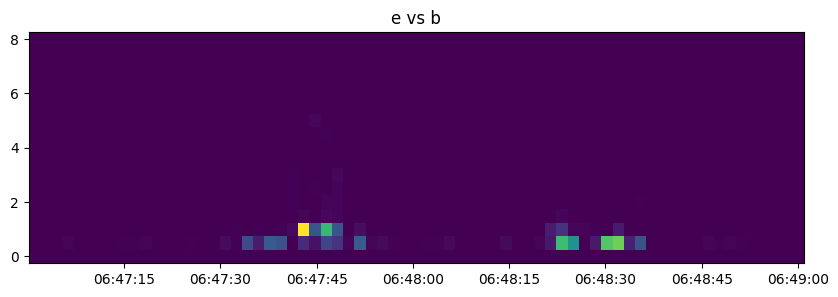

In [93]:
signal1 = e
signal2 = b
frequencies1, times1, Sxx1 = spectrogram(signal1.values, fs=16,nperseg=nperseg)
frequencies2, times2, Sxx2 = spectrogram(signal2.values, fs=16,nperseg=nperseg)
cross_spectrogram = Sxx1 * np.conj(Sxx2)
plt.figure(figsize=(10, 3))
plt.pcolormesh(ts,frequencies1,cross_spectrogram)
plt.title("e vs b")

Text(0.5, 1.0, 'e_filter vs b_filter')

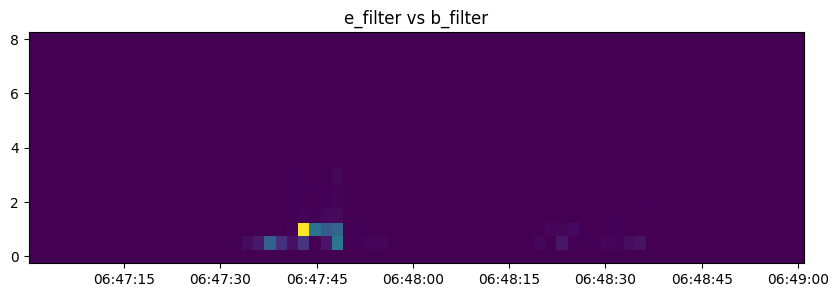

In [94]:
signal1 = e_filter
signal2 = b_filter
frequencies1, times1, Sxx1 = spectrogram(signal1.values, fs=16,nperseg=nperseg)
frequencies2, times2, Sxx2 = spectrogram(signal2.values, fs=16,nperseg=nperseg)
cross_spectrogram = Sxx1 * np.conj(Sxx2)
plt.figure(figsize=(10, 3))
plt.pcolormesh(ts,frequencies1,cross_spectrogram)
plt.title("e_filter vs b_filter")

# phase diff

Text(0.5, 1.0, 'e vs b')

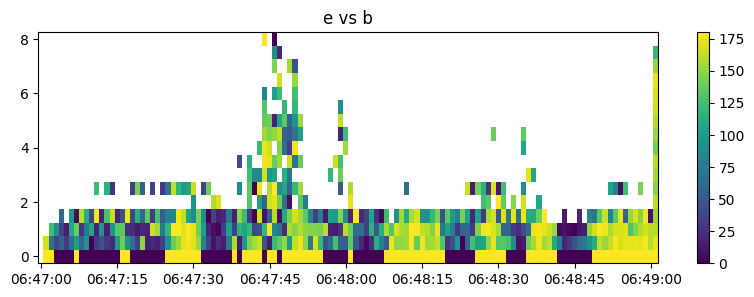

In [193]:
from scipy.signal import stft

signal1 = e
signal2 = b
frequencies1, times1, Sxx1 = stft(signal1.values, window='tukey',fs=16,nperseg=nperseg)
frequencies2, times2, Sxx2 = stft(signal2.values, window='tukey',fs=16,nperseg=nperseg)
assert all(times1 == times2)
assert all(frequencies1 == frequencies2)
ts = []
for time in times1:
    ts.append(pd.to_datetime(start) + timedelta(seconds=time))
cross_spectrogram = Sxx1 * np.conj(Sxx2)
magnitude = np.abs(cross_spectrogram)
magnitude_threshold = 0.3
phase_diff = np.degrees(np.angle(cross_spectrogram))
phase_diff[magnitude < magnitude_threshold] = np.nan
plt.figure(figsize=(10, 3))
plt.pcolormesh(ts,frequencies1,np.abs(phase_diff))
plt.colorbar()
plt.title("e vs b")

In [194]:
clip = [ts.index(pd.Timestamp('2016-03-11 06:47:05')),ts.index(pd.Timestamp('2016-03-11 06:47:25'))]
ts_static = ts[clip[0]:clip[1]+1]
frequencies1_static = frequencies1
phase_diff_static = phase_diff[:,clip[0]:clip[1]+1]

Text(0.5, 1.0, 'e vs b')

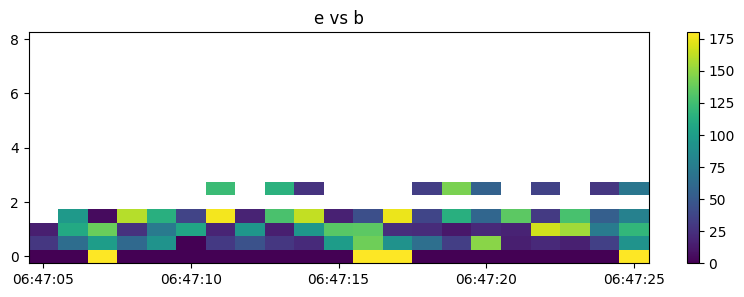

In [195]:
plt.figure(figsize=(10, 3))
plt.pcolormesh(ts_static,frequencies1_static,np.abs(phase_diff_static))
plt.colorbar()
plt.title("e vs b")

In [196]:
clip = [ts.index(pd.Timestamp('2016-03-11 06:47:35')),ts.index(pd.Timestamp('2016-03-11 06:47:55'))]
ts_active = ts[clip[0]:clip[1]+1]
frequencies1_active = frequencies1
phase_diff_active = phase_diff[:,clip[0]:clip[1]+1]

Text(0.5, 1.0, 'e vs b')

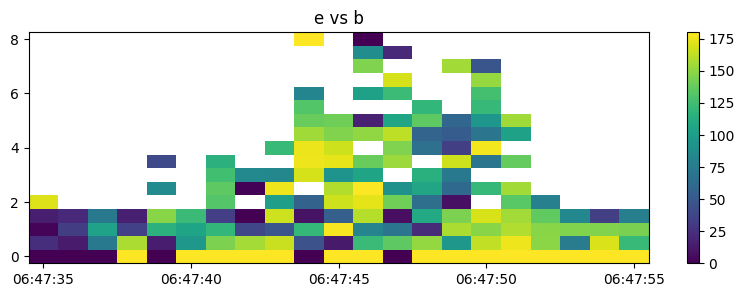

In [197]:
plt.figure(figsize=(10, 3))
plt.pcolormesh(ts_active,frequencies1_active,np.abs(phase_diff_active))
plt.colorbar()
plt.title("e vs b")

In [198]:
frequencies_flat = np.repeat(frequencies1_active[:, np.newaxis], len(ts_active), axis=1).flatten()
phase_diff_flat = phase_diff_active.flatten()

In [199]:
# Mask where phase_diff_flat is not NaN
mask = ~np.isnan(phase_diff_flat)

# Apply the mask to both arrays
frequencies_flat_clean = frequencies_flat[mask]
phase_diff_flat_clean = phase_diff_flat[mask]

In [200]:
hist, freq_edges, phase_edges = np.histogram2d(frequencies_flat_clean, phase_diff_flat_clean,bins=[30,20])

In [177]:
# # Normalize each frequency bin so each row sums to 1
# hist_normalized = hist / hist.sum(axis=1, keepdims=True)

In [201]:
# Compute the sum along the axis and avoid division by zero by using np.where
row_sums = hist.sum(axis=1, keepdims=True)

# Normalize the histogram, setting rows where the sum is zero to zero in the normalized histogram
with np.errstate(invalid='ignore', divide='ignore'):
    hist_normalized = np.where(row_sums == 0, 0, hist / row_sums)


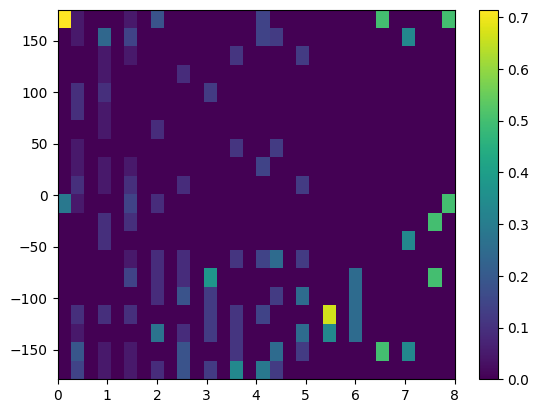

In [202]:
plt.figure()
plt.imshow(hist_normalized.T, origin='lower', aspect='auto',extent=[freq_edges[0], freq_edges[-1], phase_edges[0], phase_edges[-1]])
plt.colorbar()

In [203]:
frequencies_flat = np.repeat(frequencies1_static[:, np.newaxis], len(ts_static), axis=1).flatten()
phase_diff_flat = phase_diff_static.flatten()

In [204]:
# Mask where phase_diff_flat is not NaN
mask = ~np.isnan(phase_diff_flat)

# Apply the mask to both arrays
frequencies_flat_clean = frequencies_flat[mask]
phase_diff_flat_clean = phase_diff_flat[mask]

In [205]:
hist, freq_edges, phase_edges = np.histogram2d(frequencies_flat_clean, phase_diff_flat_clean,bins=[30,20])

In [206]:
# Compute the sum along the axis and avoid division by zero by using np.where
row_sums = hist.sum(axis=1, keepdims=True)

# Normalize the histogram, setting rows where the sum is zero to zero in the normalized histogram
with np.errstate(invalid='ignore', divide='ignore'):
    hist_normalized = np.where(row_sums == 0, 0, hist / row_sums)


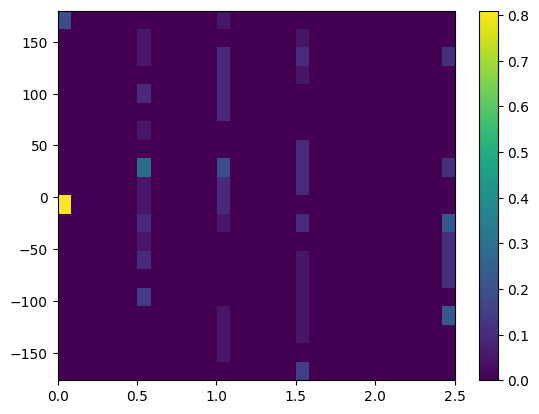

In [207]:
plt.figure()
plt.imshow(hist_normalized.T, origin='lower', aspect='auto',extent=[freq_edges[0], freq_edges[-1], phase_edges[0], phase_edges[-1]])
plt.colorbar()

# 按照f3->f4，推不了！！！

Text(0.5, 1.0, 'e_filter vs b_filter')

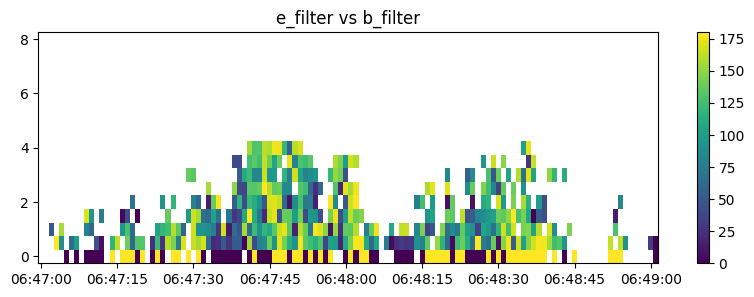

In [156]:
from scipy.signal import stft

signal1 = e_filter
signal2 = b_filter
frequencies1, times1, Sxx1 = stft(signal1.values, window='tukey',fs=16,nperseg=nperseg)
frequencies2, times2, Sxx2 = stft(signal2.values, window='tukey',fs=16,nperseg=nperseg)
assert all(times1 == times2)
assert all(frequencies1 == frequencies2)
ts = []
for time in times1:
    ts.append(pd.to_datetime(start) + timedelta(seconds=time))
cross_spectrogram = Sxx1 * np.conj(Sxx2)
magnitude = np.abs(cross_spectrogram)
magnitude_threshold = 0.3**2
# magnitude_threshold = 0.3**2
phase_diff = np.degrees(np.angle(cross_spectrogram))
phase_diff[magnitude < magnitude_threshold] = np.nan
plt.figure(figsize=(10, 3))
plt.pcolormesh(ts,frequencies1,np.abs(phase_diff))
plt.colorbar()
plt.title("e_filter vs b_filter")

In [113]:
type(ts[0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
plotsignal = utils.PlotSignal()

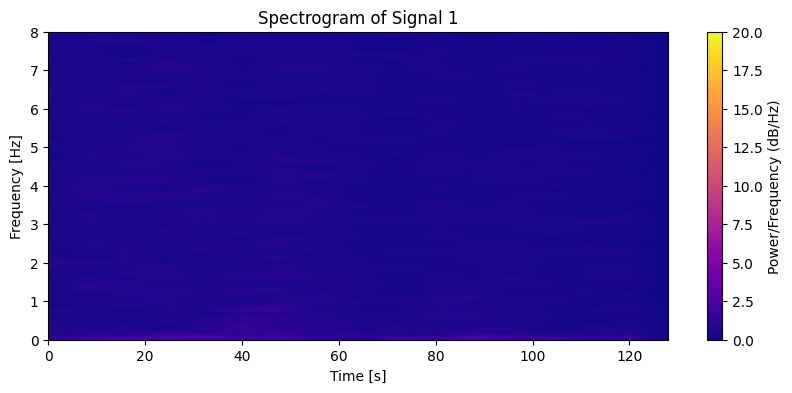

NameError: name 'nperseg' is not defined

In [23]:
plotsignal.double_signals_time_cspd(df_e['eh_enu2'],df_e['b1_enu1_interp'],16)

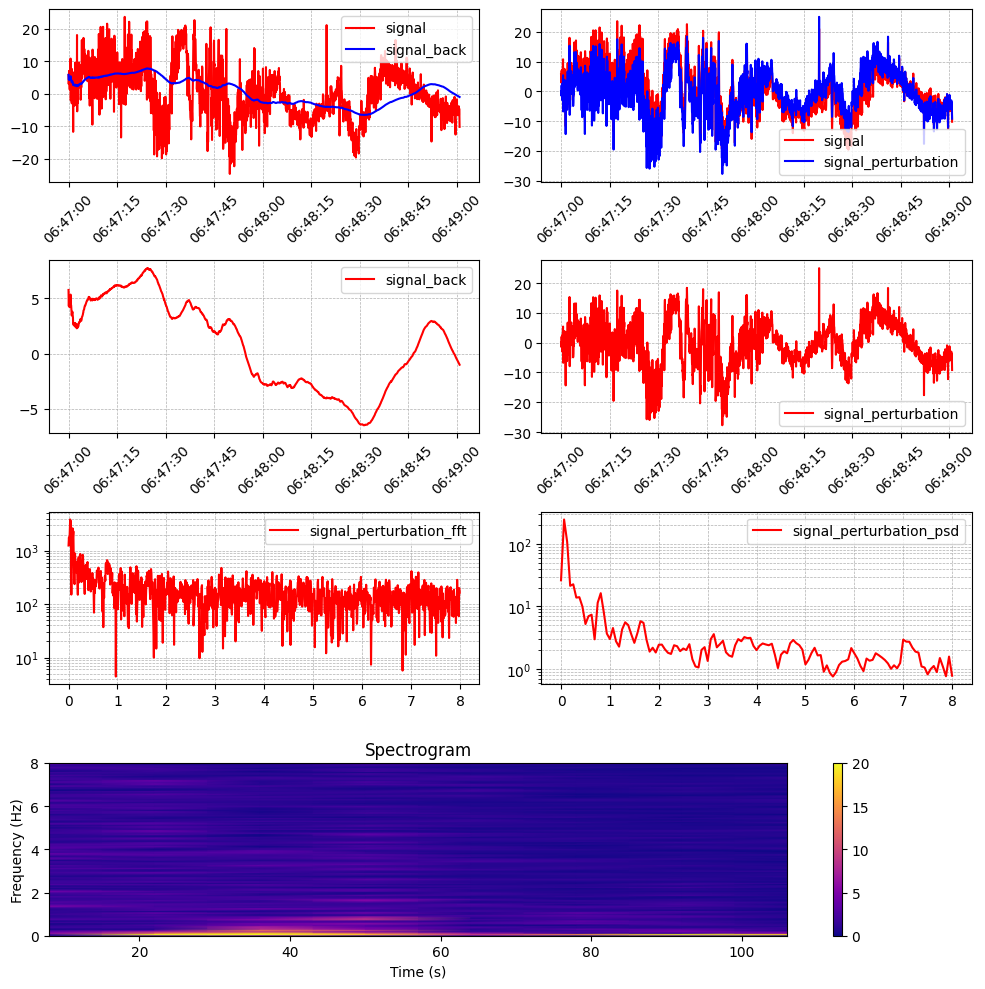

In [25]:
plotsignal.one_signal_detaild(df_e['eh_enu2'],df_e['eh0_enu2'],df_e['eh1_enu2'],16)

In [7]:
import pandas as pd
start = pd.to_datetime('2016-03-11 06:47:05')
end = pd.to_datetime('2016-03-11 06:47:25')
df_e_clip = df_e.loc[start:end]
df_b_clip = df_b.loc[start:end]

In [8]:
# import numpy as np
# 
# # Assuming electric_data and magnetic_data are your time-series data
# E_fft = np.fft.fft(df_e['eh1_enu1'])
# B_fft = np.fft.fft(df_e['b1_enu2_interp'])
# 
# # Cross-spectral density
# cross_spectral_density = E_fft * np.conj(B_fft)
# 
# # Phase difference (in radians)
# phase_diff = np.angle(cross_spectral_density)

In [9]:
# import matplotlib.pyplot as plt
# 
# # Number of bins for the histogram
# num_bins = 50  # You can adjust this value depending on how detailed you want your histogram to be
# 
# # Plotting the histogram of the phase difference
# plt.hist(phase_diff, bins=num_bins, density=True, alpha=0.7, color='blue')
# plt.xlabel('Phase Difference (radians)')
# plt.ylabel('Occurrence Density')
# plt.title('Histogram of Phase Difference Distribution')
# plt.grid(True)
# plt.show()

In [10]:
# from matplotlib import pyplot as plt
# 
# plt.figure()
# plt.plot(df_e_clip.index,df_e_clip['eh1_enu2'], color='r',label='eh1_enu2')
# plt.plot(df_e_clip.index,df_e_clip['b1_enu1_interp'],color='b',label='b1_enu1_interp')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

In [11]:
# from scipy.signal import welch
# 
# f, pxx = welch(df_e_clip['eh1_enu2'].values, fs=16, nperseg=16 * 20, noverlap=16 * 10)
# eh1_enu2_psd = pd.Series(data=pxx, index=f)

In [12]:
# f, pxx = welch(df_e_clip['b1_enu1_interp'].values, fs=16, nperseg=16 * 20, noverlap=16 * 10)
# b1_enu1_interp_psd = pd.Series(data=pxx, index=f)

In [13]:
# plt.figure()
# plt.plot(eh1_enu2_psd.index, eh1_enu2_psd.values, color='r', label='eh1_enu2_psd ((mV/m)**2)')
# plt.plot(b1_enu1_interp_psd.index, b1_enu1_interp_psd.values, color='b', label='b1_enu1_interp_psd ((nT)**2)')
# plt.yscale('log')
# plt.legend()
# # plt.xticks(rotation=45)
# plt.show()

In [14]:
# ratio = np.sqrt(eh1_enu2_psd / b1_enu1_interp_psd) * 1e6
# plt.figure()
# plt.plot(ratio.index, ratio.values, color='r', label='ratio')
# plt.yscale('log')
# plt.legend()
# plt.show()

In [72]:
start = pd.to_datetime('2016-03-11 06:47:35')
end = pd.to_datetime('2016-03-11 06:47:55')
df_e_clip = df_e.loc[start:end]
df_b_clip = df_b.loc[start:end]

In [16]:
# from matplotlib import pyplot as plt
# 
# plt.figure()
# plt.plot(df_e_clip.index,df_e_clip['eh1_enu2'], color='r',label='eh1_enu2')
# plt.plot(df_e_clip.index,df_e_clip['b1_enu1_interp'],color='b',label='b1_enu1_interp')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

In [17]:
# from scipy.signal import welch
# 
# f, pxx = welch(df_e_clip['eh1_enu2'].values, fs=16, nperseg=16 * 20, noverlap=16 * 10)
# eh1_enu2_psd = pd.Series(data=pxx, index=f)

In [18]:
# f, pxx = welch(df_e_clip['b1_enu1_interp'].values, fs=16, nperseg=16 * 20, noverlap=16 * 10)
# b1_enu1_interp_psd = pd.Series(data=pxx, index=f)

In [19]:
# plt.figure()
# plt.plot(eh1_enu2_psd.index, np.sqrt(eh1_enu2_psd.values), color='r', label='eh1_enu2_psd ((mV/m)**2)')
# plt.plot(b1_enu1_interp_psd.index, np.sqrt(b1_enu1_interp_psd.values), color='b', label='b1_enu1_interp_psd ((nT)**2)')
# plt.yscale('log')
# plt.legend()
# # plt.xticks(rotation=45)
# plt.show()

In [20]:
# ratio = np.sqrt(eh1_enu2_psd / b1_enu1_interp_psd) * 1e6
# plt.figure()
# plt.plot(ratio.index, ratio.values, color='r', label='ratio')
# plt.yscale('log')
# plt.legend()
# plt.show()

In [21]:
# from matplotlib import pyplot as plt
# 
# plt.figure()
# plt.plot(df_e_clip.index,df_e_clip['eh1_enu1'], color='r',label='eh1_enu1')
# plt.plot(df_e_clip.index,df_e_clip['b1_enu2_interp'],color='b',label='b1_enu2_interp')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

In [22]:
# from scipy.signal import welch
# 
# f, pxx = welch(df_e_clip['eh1_enu1'].values, fs=16, nperseg=16 * 20, noverlap=16 * 10)
# eh1_enu1_psd = pd.Series(data=pxx, index=f)

In [23]:
# f, pxx = welch(df_e_clip['b1_enu2_interp'].values, fs=16, nperseg=16 * 20, noverlap=16 * 10)
# b1_enu2_interp_psd = pd.Series(data=pxx, index=f)

In [24]:
# plt.figure()
# plt.plot(eh1_enu1_psd.index, eh1_enu1_psd.values, color='r', label='eh1_enu1_psd ((mV/m)**2)')
# plt.plot(b1_enu2_interp_psd.index, b1_enu2_interp_psd.values, color='b', label='b1_enu2_interp_psd ((nT)**2))')
# plt.yscale('log')
# plt.legend()
# # plt.xticks(rotation=45)
# plt.show()

In [25]:
# ratio = np.sqrt(eh1_enu1_psd / b1_enu2_interp_psd) * 1e6
# plt.figure()
# plt.plot(ratio.index, ratio.values, color='r', label='ratio')
# plt.yscale('log')
# plt.legend()
# plt.show()

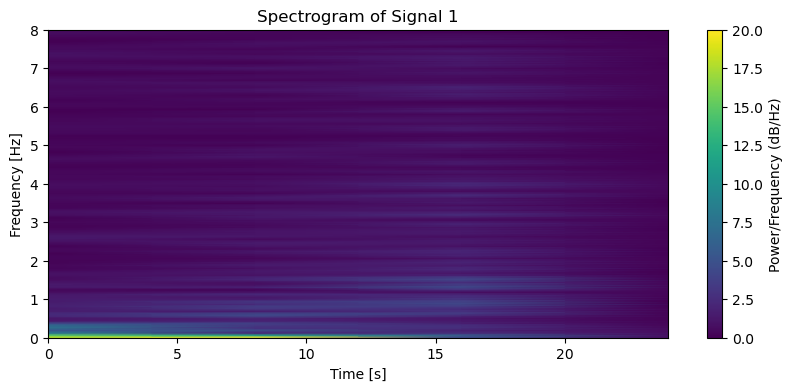

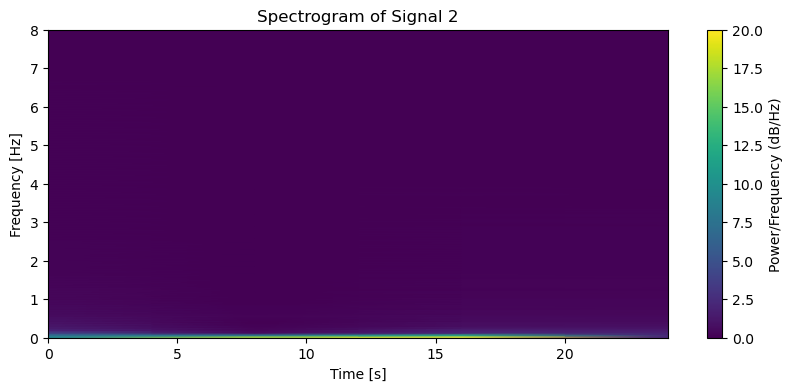

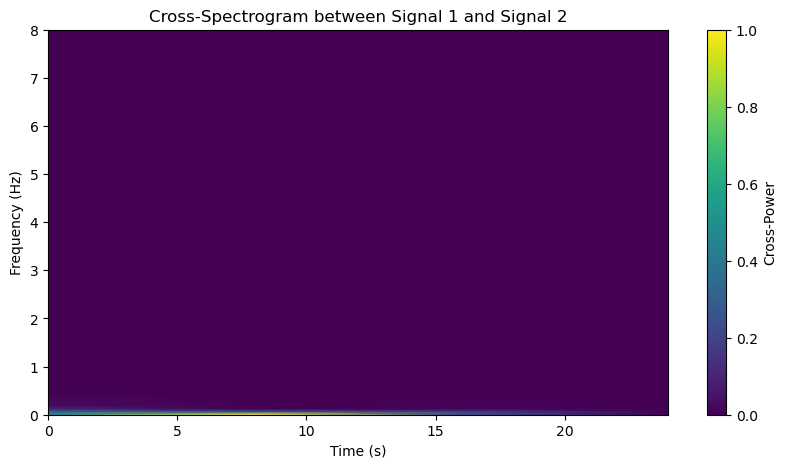

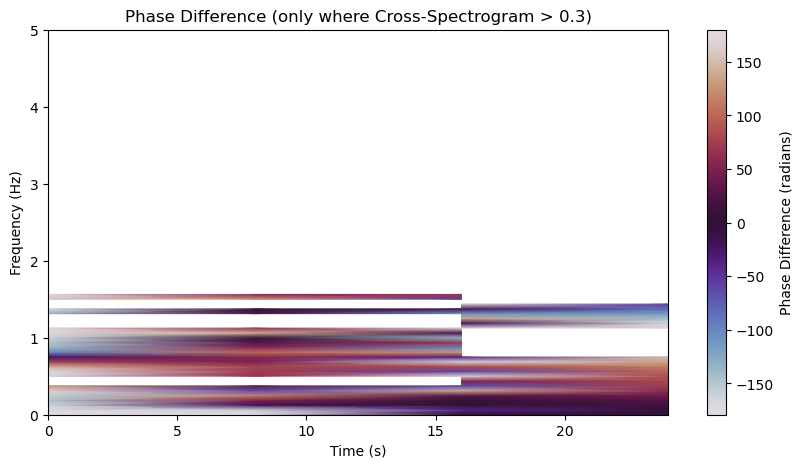

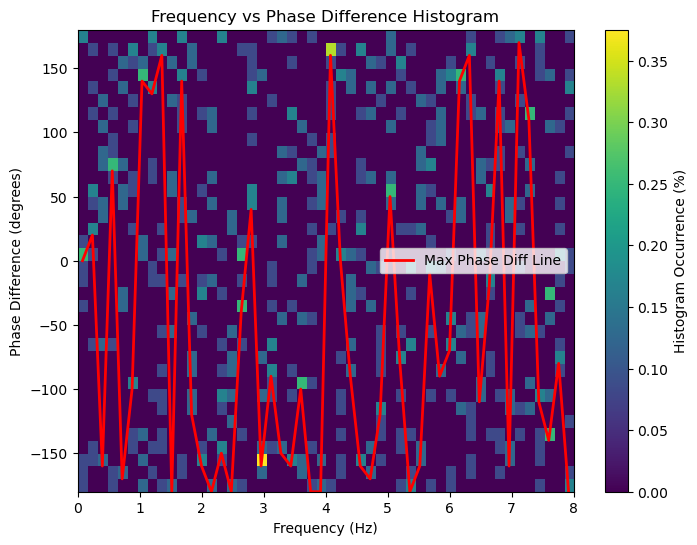

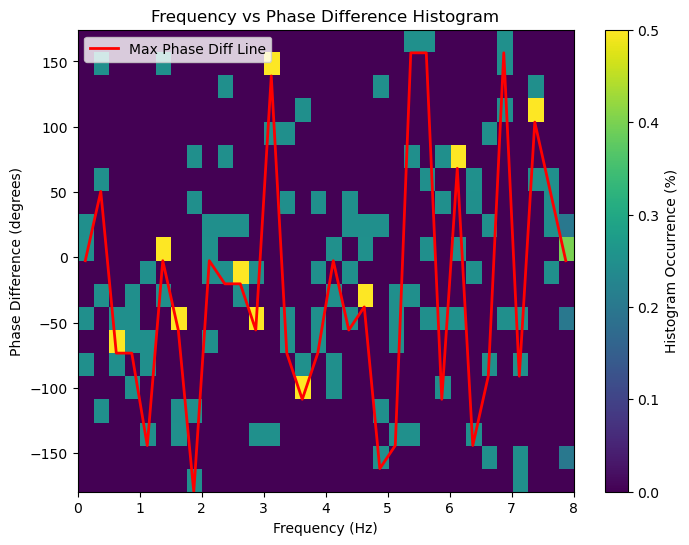

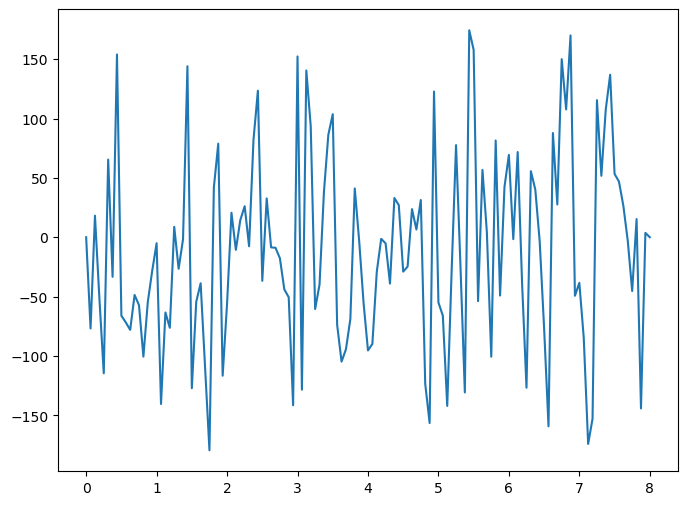

In [86]:
plotsignal = utils.PlotSignal()
plotsignal.double_signals_time_cspd(df_e_clip['eh1_enu1'],df_e_clip['b1_enu2_interp'],sampling_rate=16)